# Creating Graphs over Smart Meters dataset

In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt
import os

<ipython-input-1-011295c32d88>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
energy = pd.read_csv('energy.csv')
len(energy)

3536007

In [3]:
housecount = energy.groupby('day')[['LCLid']].nunique()
housecount.head(10)

,LCLid
day,
2011-11-23,13
2011-11-24,25
2011-11-25,32
2011-11-26,41
2011-11-27,41
2011-11-28,55
2011-11-29,63
2011-11-30,76
2011-12-01,92


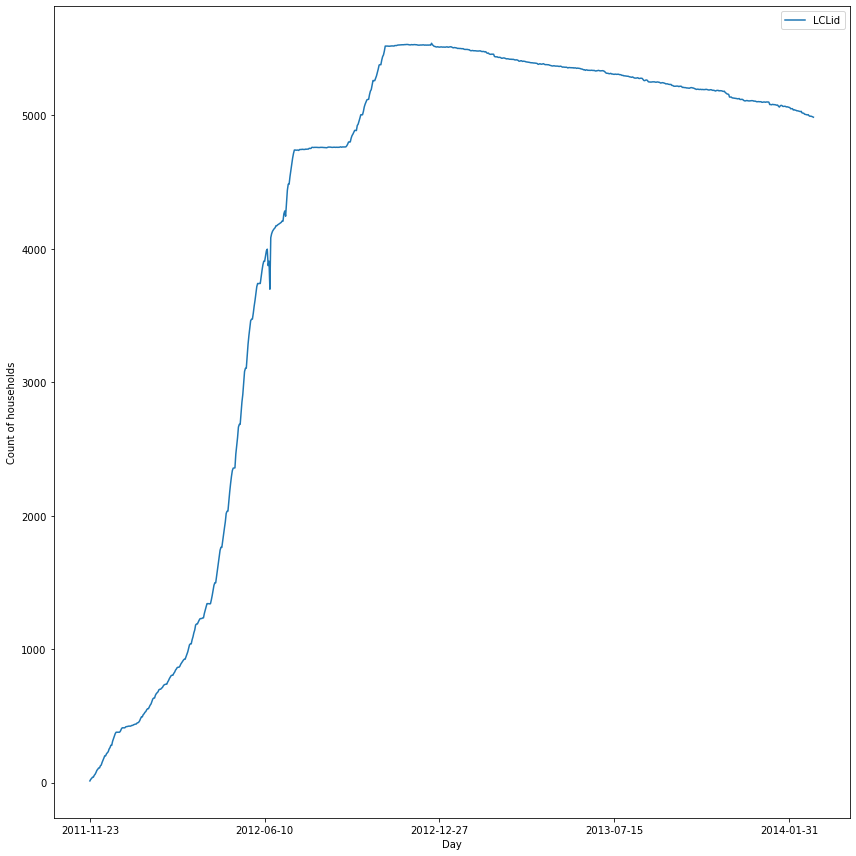

In [4]:
fig,ax=plt.subplots(figsize=(12,12))
housecount.plot(ax=ax)
plt.xlabel("Day")
plt.ylabel("Count of households")
fig.tight_layout()
plt.show()
ax.figure.savefig("count_householdday.png")

In [5]:
energy = energy.groupby('day')[['energy_sum']].sum()
energy = energy.merge(housecount, on = ['day'])
energy = energy.reset_index()
energy

,day,energy_sum,LCLid
0,2011-11-23,90.385000,13
1,2011-11-24,213.412000,25
2,2011-11-25,303.993000,32
3,2011-11-26,420.976000,41
4,2011-11-27,444.883001,41
...,...,...,...
824,2014-02-24,52867.660004,4994
825,2014-02-25,52330.109999,4995
826,2014-02-26,51804.199995,4993
827,2014-02-27,52580.878999,4990


In [6]:
energy.count()

day           829
energy_sum    829
LCLid         829
dtype: int64

In [7]:
energy.day = pd.to_datetime(energy.day,format='%Y-%m-%d').dt.date
energy['avg_energy'] =  energy['energy_sum']/energy['LCLid']
print("Starting Point of Data at Day Level",min(energy.day))
print("Ending Point of Data at Day Level",max(energy.day))

Starting Point of Data at Day Level 2011-11-23
Ending Point of Data at Day Level 2014-02-28


In [8]:
energy.describe()

,energy_sum,LCLid,avg_energy
count,829.000000,829.000000,829.000000
mean,43535.325676,4234.539204,10.491862
std,20550.594031,1789.994799,1.902513
min,90.385000,13.000000,0.211766
25%,34665.436003,4084.000000,8.676955
50%,46641.160997,5138.000000,10.516983
75%,59755.616996,5369.000000,12.000690
max,84156.135002,5541.000000,15.964434


In [9]:
energy.head()

,day,energy_sum,LCLid,avg_energy
0,2011-11-23,90.385000,13,6.952692
1,2011-11-24,213.412000,25,8.536480
2,2011-11-25,303.993000,32,9.499781
3,2011-11-26,420.976000,41,10.267707
4,2011-11-27,444.883001,41,10.850805


In [10]:
weather = pd.read_csv('weather_daily_darksky.csv')
weather.head(10)

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,11-11-2011 23:00,123,fog,9.40,11-11-2011 07:00,0.79,3.88,1016.08,11-11-2011 07:00,...,10.87,11-11-2011 07:12,11-11-2011 19:00,11-11-2011 11:00,Foggy until afternoon.,11-11-2011 19:00,6.48,11-11-2011 23:00,11-11-2011 19:00,0.52
1,8.59,11-12-2011 14:00,198,partly-cloudy-day,4.49,11-12-2011 01:00,0.56,3.94,1007.71,11-12-2011 02:00,...,8.59,11-12-2011 07:57,11-12-2011 14:00,11-12-2011 12:00,Partly cloudy throughout the day.,12-12-2011 07:00,0.11,11-12-2011 20:00,12-12-2011 08:00,0.53
2,10.33,27-12-2011 02:00,225,partly-cloudy-day,5.47,27-12-2011 23:00,0.85,3.54,1032.76,27-12-2011 22:00,...,10.33,27-12-2011 08:07,27-12-2011 14:00,27-12-2011 00:00,Mostly cloudy throughout the day.,27-12-2011 23:00,5.59,27-12-2011 02:00,28-12-2011 00:00,0.10
3,8.07,02-12-2011 23:00,232,wind,3.69,02-12-2011 07:00,0.32,3.00,1012.12,02-12-2011 07:00,...,7.36,02-12-2011 07:46,02-12-2011 12:00,02-12-2011 10:00,Partly cloudy throughout the day and breezy ov...,02-12-2011 19:00,0.46,02-12-2011 12:00,02-12-2011 19:00,0.25
4,8.22,24-12-2011 23:00,252,partly-cloudy-night,2.79,24-12-2011 07:00,0.37,4.46,1028.17,24-12-2011 07:00,...,7.93,24-12-2011 08:06,24-12-2011 15:00,24-12-2011 13:00,Mostly cloudy throughout the day.,24-12-2011 19:00,-0.51,24-12-2011 23:00,24-12-2011 20:00,0.99
5,7.97,15-12-2011 14:00,234,wind,2.41,15-12-2011 00:00,0.42,4.71,996.75,15-12-2011 00:00,...,7.97,15-12-2011 08:00,15-12-2011 14:00,15-12-2011 11:00,Partly cloudy throughout the day and breezy in...,16-12-2011 08:00,1.07,15-12-2011 21:00,16-12-2011 08:00,0.66
6,13.19,19-11-2011 14:00,117,fog,8.12,19-11-2011 23:00,0.26,2.37,1016.80,19-11-2011 08:00,...,13.19,19-11-2011 07:26,19-11-2011 14:00,19-11-2011 10:00,Foggy starting in the evening.,20-11-2011 08:00,5.98,19-11-2011 14:00,20-11-2011 08:00,0.79
7,8.32,16-11-2011 23:00,117,fog,5.58,16-11-2011 07:00,0.81,2.36,1017.40,16-11-2011 04:00,...,8.18,16-11-2011 07:20,16-11-2011 14:00,16-11-2011 11:00,Foggy starting in the evening.,16-11-2011 19:00,2.93,16-11-2011 23:00,16-11-2011 19:00,0.68
8,9.82,12-12-2011 23:00,221,wind,4.10,12-12-2011 07:00,0.38,5.02,1002.47,12-12-2011 08:00,...,8.53,12-12-2011 07:58,12-12-2011 19:00,12-12-2011 11:00,Partly cloudy throughout the day and breezy st...,13-12-2011 08:00,-0.64,12-12-2011 23:00,13-12-2011 08:00,0.56
9,9.71,20-11-2011 14:00,115,fog,6.62,20-11-2011 08:00,0.41,1.24,1018.82,20-11-2011 08:00,...,9.71,20-11-2011 07:27,20-11-2011 14:00,20-11-2011 10:00,Foggy in the morning.,21-11-2011 02:00,4.76,20-11-2011 15:00,21-11-2011 01:00,0.82


In [11]:
weather.describe()

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
count,882.000000,882.000000,882.000000,881.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,881.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,13.660113,195.702948,6.530034,0.477605,3.581803,1014.127540,12.723866,11.167143,0.781871,6.085045,12.929467,2.542565,7.709841,7.414161,13.542392,5.738039,0.500930
std,6.182744,89.340783,4.830875,0.193514,1.694007,11.073038,7.279168,2.466109,0.095348,6.031967,7.105426,1.832985,4.871004,4.888852,6.260196,6.048746,0.287022
min,-0.060000,0.000000,-7.840000,0.000000,0.200000,979.250000,-6.460000,1.480000,0.430000,-8.880000,-4.110000,0.000000,-5.640000,-5.640000,-0.810000,-8.880000,0.000000
25%,9.502500,120.500000,3.180000,0.350000,2.370000,1007.435000,7.032500,10.327500,0.720000,1.522500,7.332500,1.000000,3.990000,3.705000,9.212500,1.105000,0.260000
50%,12.625000,219.000000,6.380000,0.470000,3.440000,1014.615000,12.470000,11.970000,0.790000,5.315000,12.625000,2.000000,7.540000,7.100000,12.470000,4.885000,0.500000
75%,17.920000,255.000000,10.057500,0.600000,4.577500,1021.755000,17.910000,12.830000,0.860000,11.467500,17.920000,4.000000,11.467500,11.277500,17.910000,11.277500,0.750000
max,32.400000,359.000000,17.770000,1.000000,9.960000,1040.920000,32.420000,15.340000,0.980000,20.540000,32.420000,7.000000,20.540000,20.540000,32.400000,20.540000,0.990000


In [12]:
weather['day']=  pd.to_datetime(weather['time']) # day is given as timestamp
weather['day']=  pd.to_datetime(weather['day'],format='%Y%m%d').dt.date
# selecting numeric variables
weather = weather[['temperatureMax', 'windBearing', 'dewPoint', 'cloudCover', 'windSpeed',
       'pressure', 'apparentTemperatureHigh', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase','day']]
weather = weather.dropna()

In [13]:
weather_energy =  energy.merge(weather,on='day')
weather_energy.head(2)

,day,energy_sum,LCLid,avg_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
0,2011-11-23,90.385,13,6.952692,10.36,229,6.29,0.36,2.04,1027.12,...,8.06,0.93,6.56,10.36,1.0,8.24,3.81,10.36,2.18,0.94
1,2011-11-24,213.412,25,8.536480,12.93,204,8.56,0.41,4.04,1027.22,...,10.64,0.89,7.30,12.93,1.0,9.71,8.56,12.93,7.01,0.97


No handles with labels found to put in legend.
No handles with labels found to put in legend.


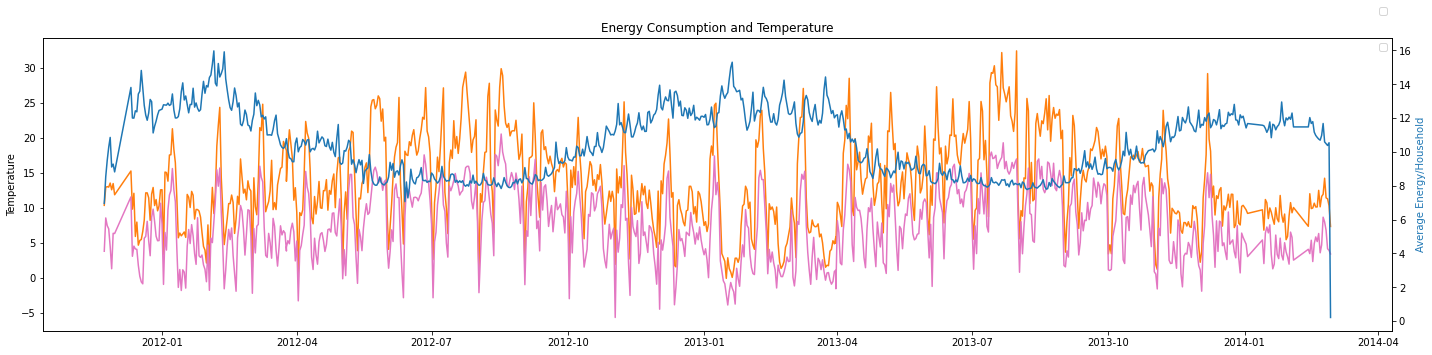

In [14]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.temperatureMax, color = 'tab:orange')
ax1.plot(weather_energy.day, weather_energy.temperatureMin, color = 'tab:pink')
ax1.set_ylabel('Temperature')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.avg_energy,color = 'tab:blue')
ax2.set_ylabel('Average Energy/Household',color = 'tab:blue')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy Consumption and Temperature')
fig.tight_layout()
plt.show()
ax1.figure.savefig('Energy VS Temp.png')

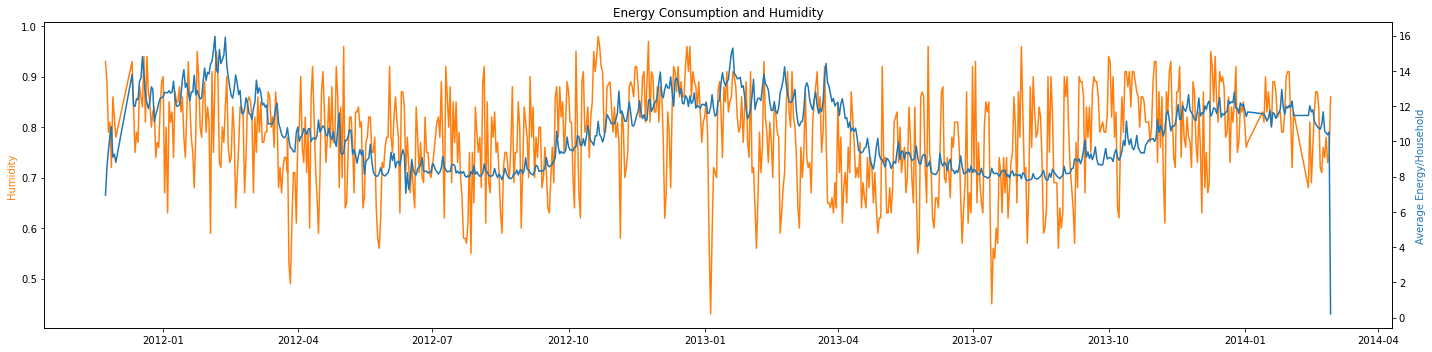

In [15]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.humidity, color = 'tab:orange')
ax1.set_ylabel('Humidity',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.avg_energy,color = 'tab:blue')
ax2.set_ylabel('Average Energy/Household',color = 'tab:blue')
plt.title('Energy Consumption and Humidity')
fig.tight_layout()
plt.show()
ax1.figure.savefig('Energy VS Humidity.png')

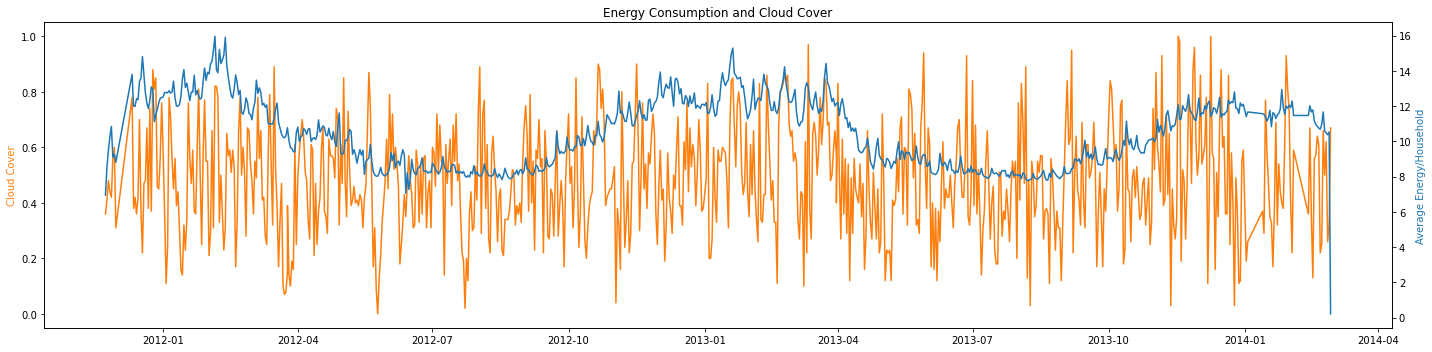

In [16]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.cloudCover, color = 'tab:orange')
ax1.set_ylabel('Cloud Cover',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.avg_energy,color = 'tab:blue')
ax2.set_ylabel('Average Energy/Household',color = 'tab:blue')
plt.title('Energy Consumption and Cloud Cover')
fig.tight_layout()
plt.show()
ax1.figure.savefig('Energy VS Cloud Cover.png')

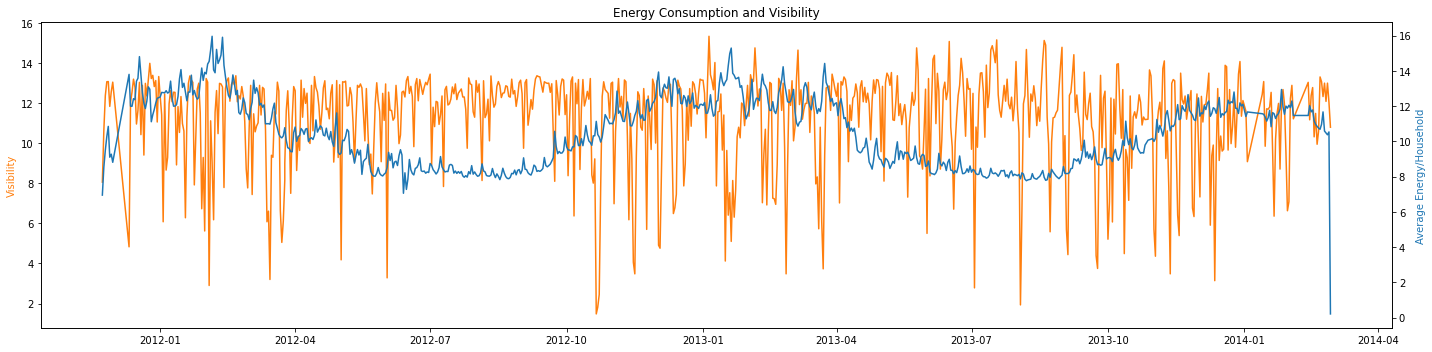

In [17]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.visibility, color = 'tab:orange')
ax1.set_ylabel('Visibility',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.avg_energy,color = 'tab:blue')
ax2.set_ylabel('Average Energy/Household',color = 'tab:blue')
plt.title('Energy Consumption and Visibility')
fig.tight_layout()
plt.show()
ax1.figure.savefig('Energy VS Visibility.png')

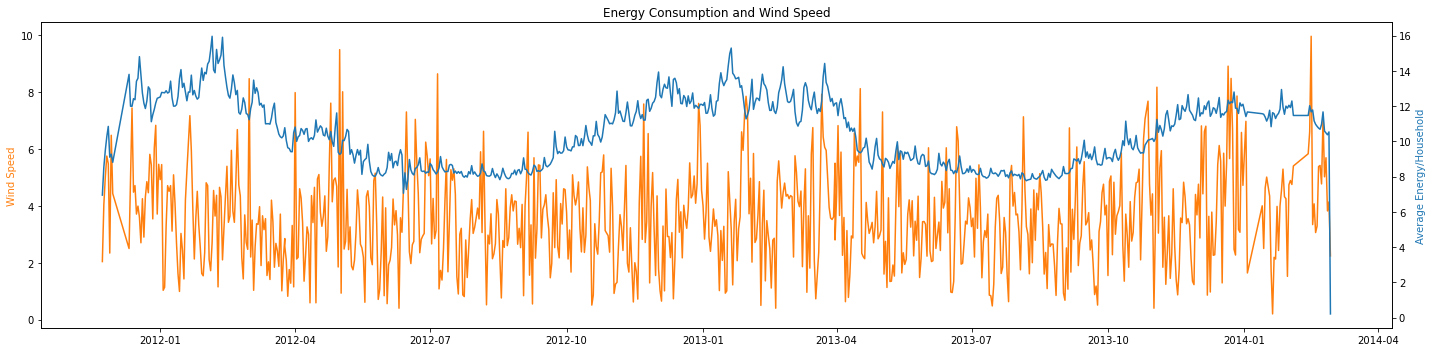

In [18]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.windSpeed, color = 'tab:orange')
ax1.set_ylabel('Wind Speed',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.avg_energy,color = 'tab:blue')
ax2.set_ylabel('Average Energy/Household',color = 'tab:blue')
plt.title('Energy Consumption and Wind Speed')
fig.tight_layout()
plt.show()
ax1.figure.savefig('Energy VS Wind speed.png')

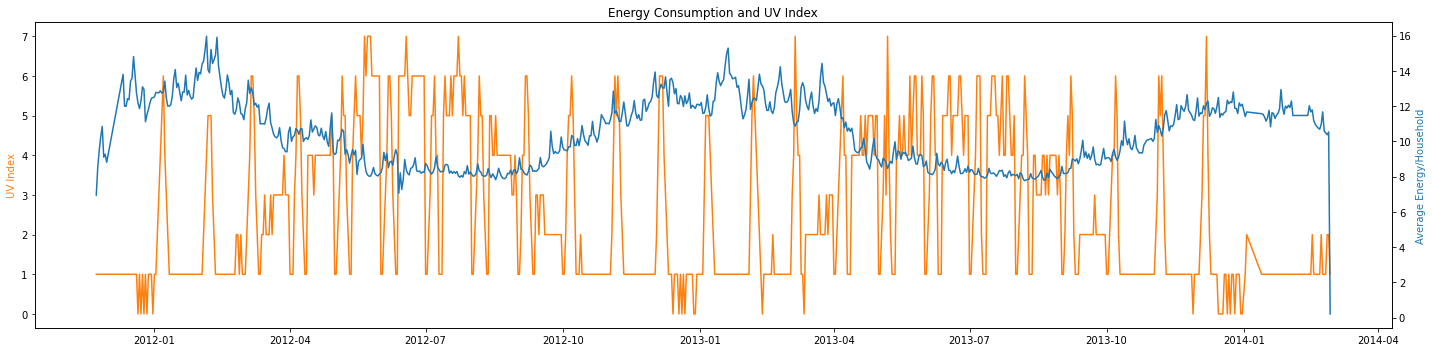

In [19]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.uvIndex, color = 'tab:orange')
ax1.set_ylabel('UV Index',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.avg_energy,color = 'tab:blue')
ax2.set_ylabel('Average Energy/Household',color = 'tab:blue')
plt.title('Energy Consumption and UV Index')
fig.tight_layout()
plt.show()
ax1.figure.savefig('Energy VS UV index.png')

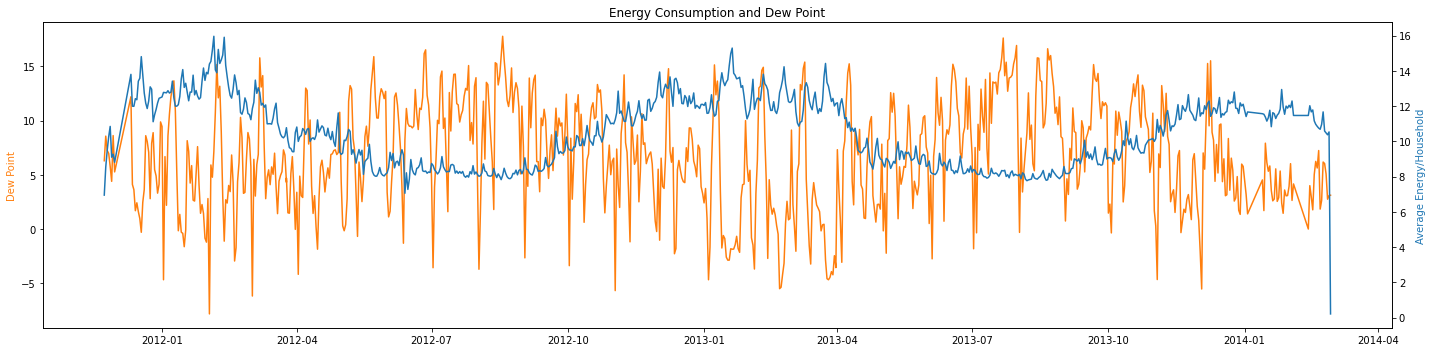

In [20]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.dewPoint, color = 'tab:orange')
ax1.set_ylabel('Dew Point',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.avg_energy,color = 'tab:blue')
ax2.set_ylabel('Average Energy/Household',color = 'tab:blue')
plt.title('Energy Consumption and Dew Point')
fig.tight_layout()
plt.show()
ax1.figure.savefig('Energy VS Dew.png')